# Analyse V1
Dec.28 2018

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
file = '\\\\192.168.1.2\\pi\\my_python\\2018-12.csv'

data = pd.read_csv(file, names=['Rank', 'Year', 'Month', 'Day','Hour', 'Minute', 'Keyword', 'Heat', 'Read', 'Discussion'], encoding='utf-8')
print(data.shape)

(20100, 10)


In [3]:
def transfer_date_time(row):
    dt = pd.Timestamp(str(row['Year'])+'-'+str(row['Month'])+'-'+str(row['Day'])+'-'+str(row['Hour'])+':'+str(row['Minute']))
    return dt
data['date_time'] = data.apply(lambda row:transfer_date_time(row), axis = 1)

data['Keyword'] = data.apply(lambda row:row['Keyword'].strip(), axis=1)
data = data[['Rank','date_time','Keyword', 'Heat', 'Read', 'Discussion']]
data.tail()

,Rank,date_time,Keyword,Heat,Read,Discussion
20095,46,2018-12-31 23:50:00,今天晚上遥控器好忙,210774,49115000,22000
20096,47,2018-12-31 23:50:00,活得最明白的渣男洪世贤,207700,26582000,9986
20097,48,2018-12-31 23:50:00,恒大与贾跃亭达成重组协议,207236,99000,29
20098,49,2018-12-31 23:50:00,带宠物猪过安检,207047,5950000,557
20099,50,2018-12-31 23:50:00,苏打绿吴青峰单飞,206934,100000000,6878


In [4]:
# df = data.loc[data['Rank'] <= 5]
# df = data.loc[(data['Keyword'] == "刘德华现场中止演唱会") | (data['Keyword'] =="刘恺威抱小糯米出行")]
rank_1 = data.loc[data['Rank'] == 1]['Keyword'].unique()
df = data.loc[data['Keyword'].isin(rank_1)]
cols = df['Keyword'].unique()
rows = df['date_time'].unique()
ts_df = pd.DataFrame(index = rows, columns=cols)
for _, row in df.iterrows():
    ts_df.at[row['date_time'], row['Keyword']] = row['Heat']

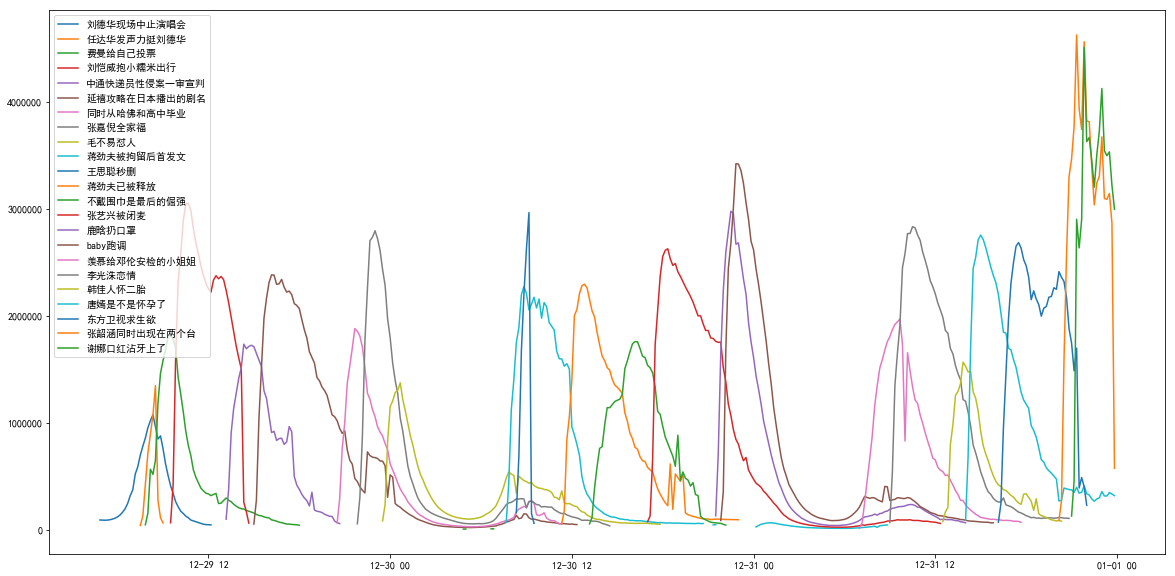

In [5]:
from pylab import mpl

mpl.rcParams['font.sans-serif'] = ['SimHei'] # 指定默认字体
mpl.rcParams['axes.unicode_minus'] = False # 解决保存图像是负号'-'显示为方块的问题

plt.figure(figsize=(20,10))
plt.plot(ts_df)
plt.legend(ts_df.columns)

plt.show()